## Feature analysis

Importing the libraries and the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import math


notebook = 'Feature_Exploration.ipnyb'
path = os.path.dirname(os.path.abspath(notebook))+'/data/'
X_train_path = path+'X_train_resampled.csv'
y_train_path = path+'y_train_resampled.csv'
test_path = path+'test.csv'

X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path).to_numpy()
test = pd.read_csv(test_path)
X_test = test.loc[:,~test.columns.isin(['target'])]
y_test = test['target']

Since I have failed to save the previously trained model, it will be needed to retrain it with the same parameters as in the modelling notebook.

In [2]:
import random 

seed_value = 42
random.seed(seed_value) 
np.random.seed(seed_value)

In [3]:
scale_pos_weight = round(sum(y_test==0)/sum(y_test==1),0)
n_estimators = 750

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","auc","error"]

XGBC = XGBClassifier(n_estimators=n_estimators,
                      scale_pos_weight=scale_pos_weight,
                      seed=seed_value,
                      random_state=seed_value)
%time XGBC.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.57788	validation_0-auc:0.86303	validation_0-error:0.22419	validation_1-logloss:0.74509	validation_1-auc:0.79084	validation_1-error:0.51749
[1]	validation_0-logloss:0.52950	validation_0-auc:0.87495	validation_0-error:0.21828	validation_1-logloss:0.81628	validation_1-auc:0.80060	validation_1-error:0.50954
[2]	validation_0-logloss:0.50470	validation_0-auc:0.90980	validation_0-error:0.23311	validation_1-logloss:0.88334	validation_1-auc:0.83822	validation_1-error:0.54001
[3]	validation_0-logloss:0.49473	validation_0-auc:0.92149	validation_0-error:0.22399	validation_1-logloss:0.95090	validation_1-auc:0.84922	validation_1-error:0.52508
[4]	validation_0-logloss:0.48236	validation_0-auc:0.93153	validation_0-error:0.22248	validation_1-logloss:0.99491	validation_1-auc:0.85954	validation_1-error:0.52637
[5]	validation_0-logloss:0.47345	validation_0-auc:0.94210	validation_0-error:0.21988	validation_1-logloss:1.03050	validation_1-auc:0.86833	validation_1-error:0.52349
[6]	

[50]	validation_0-logloss:0.26949	validation_0-auc:0.98755	validation_0-error:0.11595	validation_1-logloss:0.91374	validation_1-auc:0.90309	validation_1-error:0.34121
[51]	validation_0-logloss:0.26833	validation_0-auc:0.98768	validation_0-error:0.11549	validation_1-logloss:0.91131	validation_1-auc:0.90316	validation_1-error:0.34002
[52]	validation_0-logloss:0.26653	validation_0-auc:0.98779	validation_0-error:0.11459	validation_1-logloss:0.91008	validation_1-auc:0.90328	validation_1-error:0.33822
[53]	validation_0-logloss:0.26400	validation_0-auc:0.98801	validation_0-error:0.11359	validation_1-logloss:0.90592	validation_1-auc:0.90310	validation_1-error:0.33649
[54]	validation_0-logloss:0.26154	validation_0-auc:0.98818	validation_0-error:0.11240	validation_1-logloss:0.90227	validation_1-auc:0.90314	validation_1-error:0.33449
[55]	validation_0-logloss:0.26037	validation_0-auc:0.98828	validation_0-error:0.11175	validation_1-logloss:0.90020	validation_1-auc:0.90322	validation_1-error:0.3333

[100]	validation_0-logloss:0.20184	validation_0-auc:0.99307	validation_0-error:0.08648	validation_1-logloss:0.79397	validation_1-auc:0.90258	validation_1-error:0.28787
[101]	validation_0-logloss:0.20154	validation_0-auc:0.99309	validation_0-error:0.08628	validation_1-logloss:0.79321	validation_1-auc:0.90249	validation_1-error:0.28739
[102]	validation_0-logloss:0.20053	validation_0-auc:0.99319	validation_0-error:0.08600	validation_1-logloss:0.79110	validation_1-auc:0.90252	validation_1-error:0.28709
[103]	validation_0-logloss:0.19920	validation_0-auc:0.99329	validation_0-error:0.08548	validation_1-logloss:0.78818	validation_1-auc:0.90243	validation_1-error:0.28623
[104]	validation_0-logloss:0.19852	validation_0-auc:0.99335	validation_0-error:0.08528	validation_1-logloss:0.78686	validation_1-auc:0.90245	validation_1-error:0.28552
[105]	validation_0-logloss:0.19753	validation_0-auc:0.99342	validation_0-error:0.08479	validation_1-logloss:0.78522	validation_1-auc:0.90260	validation_1-error:

[149]	validation_0-logloss:0.16165	validation_0-auc:0.99574	validation_0-error:0.06797	validation_1-logloss:0.71487	validation_1-auc:0.90290	validation_1-error:0.25484
[150]	validation_0-logloss:0.16138	validation_0-auc:0.99575	validation_0-error:0.06776	validation_1-logloss:0.71472	validation_1-auc:0.90292	validation_1-error:0.25458
[151]	validation_0-logloss:0.15977	validation_0-auc:0.99583	validation_0-error:0.06709	validation_1-logloss:0.71117	validation_1-auc:0.90310	validation_1-error:0.25292
[152]	validation_0-logloss:0.15943	validation_0-auc:0.99586	validation_0-error:0.06698	validation_1-logloss:0.71015	validation_1-auc:0.90306	validation_1-error:0.25292
[153]	validation_0-logloss:0.15918	validation_0-auc:0.99587	validation_0-error:0.06693	validation_1-logloss:0.70965	validation_1-auc:0.90296	validation_1-error:0.25241
[154]	validation_0-logloss:0.15899	validation_0-auc:0.99588	validation_0-error:0.06676	validation_1-logloss:0.70953	validation_1-auc:0.90291	validation_1-error:

[198]	validation_0-logloss:0.13012	validation_0-auc:0.99743	validation_0-error:0.05397	validation_1-logloss:0.64352	validation_1-auc:0.90325	validation_1-error:0.22950
[199]	validation_0-logloss:0.12993	validation_0-auc:0.99745	validation_0-error:0.05389	validation_1-logloss:0.64321	validation_1-auc:0.90322	validation_1-error:0.22940
[200]	validation_0-logloss:0.12955	validation_0-auc:0.99747	validation_0-error:0.05369	validation_1-logloss:0.64289	validation_1-auc:0.90328	validation_1-error:0.22923
[201]	validation_0-logloss:0.12841	validation_0-auc:0.99751	validation_0-error:0.05274	validation_1-logloss:0.64063	validation_1-auc:0.90342	validation_1-error:0.22742
[202]	validation_0-logloss:0.12740	validation_0-auc:0.99755	validation_0-error:0.05225	validation_1-logloss:0.63851	validation_1-auc:0.90351	validation_1-error:0.22657
[203]	validation_0-logloss:0.12631	validation_0-auc:0.99759	validation_0-error:0.05167	validation_1-logloss:0.63621	validation_1-auc:0.90355	validation_1-error:

[247]	validation_0-logloss:0.10110	validation_0-auc:0.99857	validation_0-error:0.04053	validation_1-logloss:0.57578	validation_1-auc:0.90485	validation_1-error:0.20399
[248]	validation_0-logloss:0.10071	validation_0-auc:0.99858	validation_0-error:0.04031	validation_1-logloss:0.57512	validation_1-auc:0.90482	validation_1-error:0.20357
[249]	validation_0-logloss:0.10049	validation_0-auc:0.99858	validation_0-error:0.04029	validation_1-logloss:0.57497	validation_1-auc:0.90487	validation_1-error:0.20339
[250]	validation_0-logloss:0.10035	validation_0-auc:0.99859	validation_0-error:0.04020	validation_1-logloss:0.57480	validation_1-auc:0.90487	validation_1-error:0.20326
[251]	validation_0-logloss:0.10019	validation_0-auc:0.99859	validation_0-error:0.04016	validation_1-logloss:0.57467	validation_1-auc:0.90488	validation_1-error:0.20307
[252]	validation_0-logloss:0.10004	validation_0-auc:0.99860	validation_0-error:0.04008	validation_1-logloss:0.57513	validation_1-auc:0.90499	validation_1-error:

[296]	validation_0-logloss:0.08638	validation_0-auc:0.99898	validation_0-error:0.03382	validation_1-logloss:0.54657	validation_1-auc:0.90570	validation_1-error:0.19017
[297]	validation_0-logloss:0.08620	validation_0-auc:0.99899	validation_0-error:0.03375	validation_1-logloss:0.54631	validation_1-auc:0.90574	validation_1-error:0.19002
[298]	validation_0-logloss:0.08590	validation_0-auc:0.99899	validation_0-error:0.03361	validation_1-logloss:0.54550	validation_1-auc:0.90575	validation_1-error:0.18988
[299]	validation_0-logloss:0.08566	validation_0-auc:0.99900	validation_0-error:0.03346	validation_1-logloss:0.54526	validation_1-auc:0.90585	validation_1-error:0.18987
[300]	validation_0-logloss:0.08544	validation_0-auc:0.99900	validation_0-error:0.03340	validation_1-logloss:0.54490	validation_1-auc:0.90588	validation_1-error:0.18960
[301]	validation_0-logloss:0.08514	validation_0-auc:0.99901	validation_0-error:0.03330	validation_1-logloss:0.54462	validation_1-auc:0.90593	validation_1-error:

[345]	validation_0-logloss:0.07615	validation_0-auc:0.99923	validation_0-error:0.02902	validation_1-logloss:0.53081	validation_1-auc:0.90631	validation_1-error:0.18243
[346]	validation_0-logloss:0.07602	validation_0-auc:0.99923	validation_0-error:0.02894	validation_1-logloss:0.53050	validation_1-auc:0.90629	validation_1-error:0.18237
[347]	validation_0-logloss:0.07586	validation_0-auc:0.99924	validation_0-error:0.02886	validation_1-logloss:0.53039	validation_1-auc:0.90634	validation_1-error:0.18231
[348]	validation_0-logloss:0.07575	validation_0-auc:0.99924	validation_0-error:0.02880	validation_1-logloss:0.53028	validation_1-auc:0.90633	validation_1-error:0.18214
[349]	validation_0-logloss:0.07561	validation_0-auc:0.99924	validation_0-error:0.02877	validation_1-logloss:0.53019	validation_1-auc:0.90634	validation_1-error:0.18195
[350]	validation_0-logloss:0.07521	validation_0-auc:0.99925	validation_0-error:0.02860	validation_1-logloss:0.52862	validation_1-auc:0.90634	validation_1-error:

[394]	validation_0-logloss:0.06844	validation_0-auc:0.99940	validation_0-error:0.02578	validation_1-logloss:0.51804	validation_1-auc:0.90623	validation_1-error:0.17658
[395]	validation_0-logloss:0.06810	validation_0-auc:0.99941	validation_0-error:0.02560	validation_1-logloss:0.51700	validation_1-auc:0.90623	validation_1-error:0.17612
[396]	validation_0-logloss:0.06791	validation_0-auc:0.99941	validation_0-error:0.02554	validation_1-logloss:0.51671	validation_1-auc:0.90620	validation_1-error:0.17596
[397]	validation_0-logloss:0.06783	validation_0-auc:0.99941	validation_0-error:0.02546	validation_1-logloss:0.51684	validation_1-auc:0.90616	validation_1-error:0.17590
[398]	validation_0-logloss:0.06779	validation_0-auc:0.99941	validation_0-error:0.02545	validation_1-logloss:0.51679	validation_1-auc:0.90620	validation_1-error:0.17585
[399]	validation_0-logloss:0.06765	validation_0-auc:0.99942	validation_0-error:0.02540	validation_1-logloss:0.51659	validation_1-auc:0.90621	validation_1-error:

[443]	validation_0-logloss:0.06183	validation_0-auc:0.99952	validation_0-error:0.02269	validation_1-logloss:0.50914	validation_1-auc:0.90636	validation_1-error:0.16999
[444]	validation_0-logloss:0.06178	validation_0-auc:0.99952	validation_0-error:0.02266	validation_1-logloss:0.50920	validation_1-auc:0.90636	validation_1-error:0.16995
[445]	validation_0-logloss:0.06172	validation_0-auc:0.99952	validation_0-error:0.02263	validation_1-logloss:0.50934	validation_1-auc:0.90640	validation_1-error:0.16972
[446]	validation_0-logloss:0.06155	validation_0-auc:0.99953	validation_0-error:0.02259	validation_1-logloss:0.50869	validation_1-auc:0.90635	validation_1-error:0.16975
[447]	validation_0-logloss:0.06141	validation_0-auc:0.99953	validation_0-error:0.02254	validation_1-logloss:0.50842	validation_1-auc:0.90638	validation_1-error:0.16972
[448]	validation_0-logloss:0.06126	validation_0-auc:0.99953	validation_0-error:0.02249	validation_1-logloss:0.50820	validation_1-auc:0.90634	validation_1-error:

[492]	validation_0-logloss:0.05661	validation_0-auc:0.99961	validation_0-error:0.02056	validation_1-logloss:0.50322	validation_1-auc:0.90636	validation_1-error:0.16654
[493]	validation_0-logloss:0.05655	validation_0-auc:0.99961	validation_0-error:0.02055	validation_1-logloss:0.50310	validation_1-auc:0.90636	validation_1-error:0.16636
[494]	validation_0-logloss:0.05645	validation_0-auc:0.99961	validation_0-error:0.02052	validation_1-logloss:0.50298	validation_1-auc:0.90636	validation_1-error:0.16638
[495]	validation_0-logloss:0.05635	validation_0-auc:0.99961	validation_0-error:0.02048	validation_1-logloss:0.50284	validation_1-auc:0.90633	validation_1-error:0.16631
[496]	validation_0-logloss:0.05627	validation_0-auc:0.99962	validation_0-error:0.02045	validation_1-logloss:0.50274	validation_1-auc:0.90634	validation_1-error:0.16638
[497]	validation_0-logloss:0.05619	validation_0-auc:0.99962	validation_0-error:0.02044	validation_1-logloss:0.50275	validation_1-auc:0.90629	validation_1-error:

[541]	validation_0-logloss:0.05199	validation_0-auc:0.99968	validation_0-error:0.01870	validation_1-logloss:0.49739	validation_1-auc:0.90639	validation_1-error:0.16275
[542]	validation_0-logloss:0.05184	validation_0-auc:0.99968	validation_0-error:0.01865	validation_1-logloss:0.49719	validation_1-auc:0.90640	validation_1-error:0.16270
[543]	validation_0-logloss:0.05174	validation_0-auc:0.99968	validation_0-error:0.01859	validation_1-logloss:0.49700	validation_1-auc:0.90643	validation_1-error:0.16254
[544]	validation_0-logloss:0.05160	validation_0-auc:0.99969	validation_0-error:0.01851	validation_1-logloss:0.49679	validation_1-auc:0.90638	validation_1-error:0.16265
[545]	validation_0-logloss:0.05146	validation_0-auc:0.99969	validation_0-error:0.01840	validation_1-logloss:0.49644	validation_1-auc:0.90638	validation_1-error:0.16254
[546]	validation_0-logloss:0.05132	validation_0-auc:0.99969	validation_0-error:0.01841	validation_1-logloss:0.49639	validation_1-auc:0.90637	validation_1-error:

[590]	validation_0-logloss:0.04761	validation_0-auc:0.99974	validation_0-error:0.01674	validation_1-logloss:0.49392	validation_1-auc:0.90634	validation_1-error:0.15939
[591]	validation_0-logloss:0.04756	validation_0-auc:0.99974	validation_0-error:0.01671	validation_1-logloss:0.49396	validation_1-auc:0.90632	validation_1-error:0.15939
[592]	validation_0-logloss:0.04747	validation_0-auc:0.99974	validation_0-error:0.01668	validation_1-logloss:0.49395	validation_1-auc:0.90630	validation_1-error:0.15939
[593]	validation_0-logloss:0.04738	validation_0-auc:0.99974	validation_0-error:0.01667	validation_1-logloss:0.49360	validation_1-auc:0.90631	validation_1-error:0.15942
[594]	validation_0-logloss:0.04726	validation_0-auc:0.99974	validation_0-error:0.01660	validation_1-logloss:0.49347	validation_1-auc:0.90628	validation_1-error:0.15934
[595]	validation_0-logloss:0.04719	validation_0-auc:0.99974	validation_0-error:0.01657	validation_1-logloss:0.49334	validation_1-auc:0.90630	validation_1-error:

[639]	validation_0-logloss:0.04394	validation_0-auc:0.99978	validation_0-error:0.01528	validation_1-logloss:0.49237	validation_1-auc:0.90614	validation_1-error:0.15715
[640]	validation_0-logloss:0.04386	validation_0-auc:0.99978	validation_0-error:0.01524	validation_1-logloss:0.49220	validation_1-auc:0.90620	validation_1-error:0.15709
[641]	validation_0-logloss:0.04380	validation_0-auc:0.99978	validation_0-error:0.01524	validation_1-logloss:0.49204	validation_1-auc:0.90618	validation_1-error:0.15708
[642]	validation_0-logloss:0.04369	validation_0-auc:0.99979	validation_0-error:0.01520	validation_1-logloss:0.49173	validation_1-auc:0.90619	validation_1-error:0.15696
[643]	validation_0-logloss:0.04363	validation_0-auc:0.99979	validation_0-error:0.01513	validation_1-logloss:0.49199	validation_1-auc:0.90619	validation_1-error:0.15684
[644]	validation_0-logloss:0.04358	validation_0-auc:0.99979	validation_0-error:0.01515	validation_1-logloss:0.49202	validation_1-auc:0.90619	validation_1-error:

[688]	validation_0-logloss:0.04040	validation_0-auc:0.99982	validation_0-error:0.01391	validation_1-logloss:0.49069	validation_1-auc:0.90600	validation_1-error:0.15467
[689]	validation_0-logloss:0.04031	validation_0-auc:0.99982	validation_0-error:0.01386	validation_1-logloss:0.49023	validation_1-auc:0.90599	validation_1-error:0.15460
[690]	validation_0-logloss:0.04029	validation_0-auc:0.99982	validation_0-error:0.01384	validation_1-logloss:0.49070	validation_1-auc:0.90602	validation_1-error:0.15463
[691]	validation_0-logloss:0.04021	validation_0-auc:0.99982	validation_0-error:0.01379	validation_1-logloss:0.49071	validation_1-auc:0.90600	validation_1-error:0.15436
[692]	validation_0-logloss:0.04014	validation_0-auc:0.99982	validation_0-error:0.01379	validation_1-logloss:0.49072	validation_1-auc:0.90600	validation_1-error:0.15438
[693]	validation_0-logloss:0.04012	validation_0-auc:0.99982	validation_0-error:0.01381	validation_1-logloss:0.49062	validation_1-auc:0.90600	validation_1-error:

[737]	validation_0-logloss:0.03759	validation_0-auc:0.99985	validation_0-error:0.01266	validation_1-logloss:0.49001	validation_1-auc:0.90580	validation_1-error:0.15259
[738]	validation_0-logloss:0.03754	validation_0-auc:0.99985	validation_0-error:0.01263	validation_1-logloss:0.48989	validation_1-auc:0.90580	validation_1-error:0.15244
[739]	validation_0-logloss:0.03746	validation_0-auc:0.99985	validation_0-error:0.01256	validation_1-logloss:0.48978	validation_1-auc:0.90580	validation_1-error:0.15237
[740]	validation_0-logloss:0.03744	validation_0-auc:0.99985	validation_0-error:0.01255	validation_1-logloss:0.48970	validation_1-auc:0.90581	validation_1-error:0.15243
[741]	validation_0-logloss:0.03740	validation_0-auc:0.99985	validation_0-error:0.01254	validation_1-logloss:0.48966	validation_1-auc:0.90582	validation_1-error:0.15234
[742]	validation_0-logloss:0.03734	validation_0-auc:0.99985	validation_0-error:0.01253	validation_1-logloss:0.48971	validation_1-auc:0.90585	validation_1-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11.0, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Feature importance

Now that the model is trained we can use the inbuilt method feature_importances to try to interpret the model results.

In [4]:
importances = XGBC.feature_importances_
features_names = []
ordered_importances = []
for i in np.argsort(importances)[::-1]:
    features_names.append(X_test.columns[i])
    ordered_importances.append(importances[i])
    print( X_test.columns[i],"%.4f" % importances[i])

tax filer status_ Nonfiler 0.3089
major occupation code_ Other service 0.0369
education_ 5th or 6th grade 0.0255
major occupation code_ Private household services 0.0249
education_ 9th grade 0.0242
education_ 7th and 8th grade 0.0188
education_ 11th grade 0.0174
major industry code_ Not in universe or children 0.0170
weeks worked in year 0.0158
education_ 1st 2nd 3rd or 4th grade 0.0145
major occupation code_ Handlers equip cleaners etc  0.0142
hispanic origin_ Mexican (Mexicano) 0.0139
major industry code_ Social services 0.0121
hispanic origin_ Central or South American 0.0113
detailed household summary in household_ Spouse of householder 0.0108
major industry code_ Education 0.0108
sex_ Male 0.0107
education_ 12th grade no diploma 0.0104
education_ High school graduate 0.0100
major industry code_ Private household services 0.0095
detailed household summary in household_ Other relative of householder 0.0092
major occupation code_ Professional specialty 0.0091
race_ Black 0.0089
divid

Again in a more visual manner.

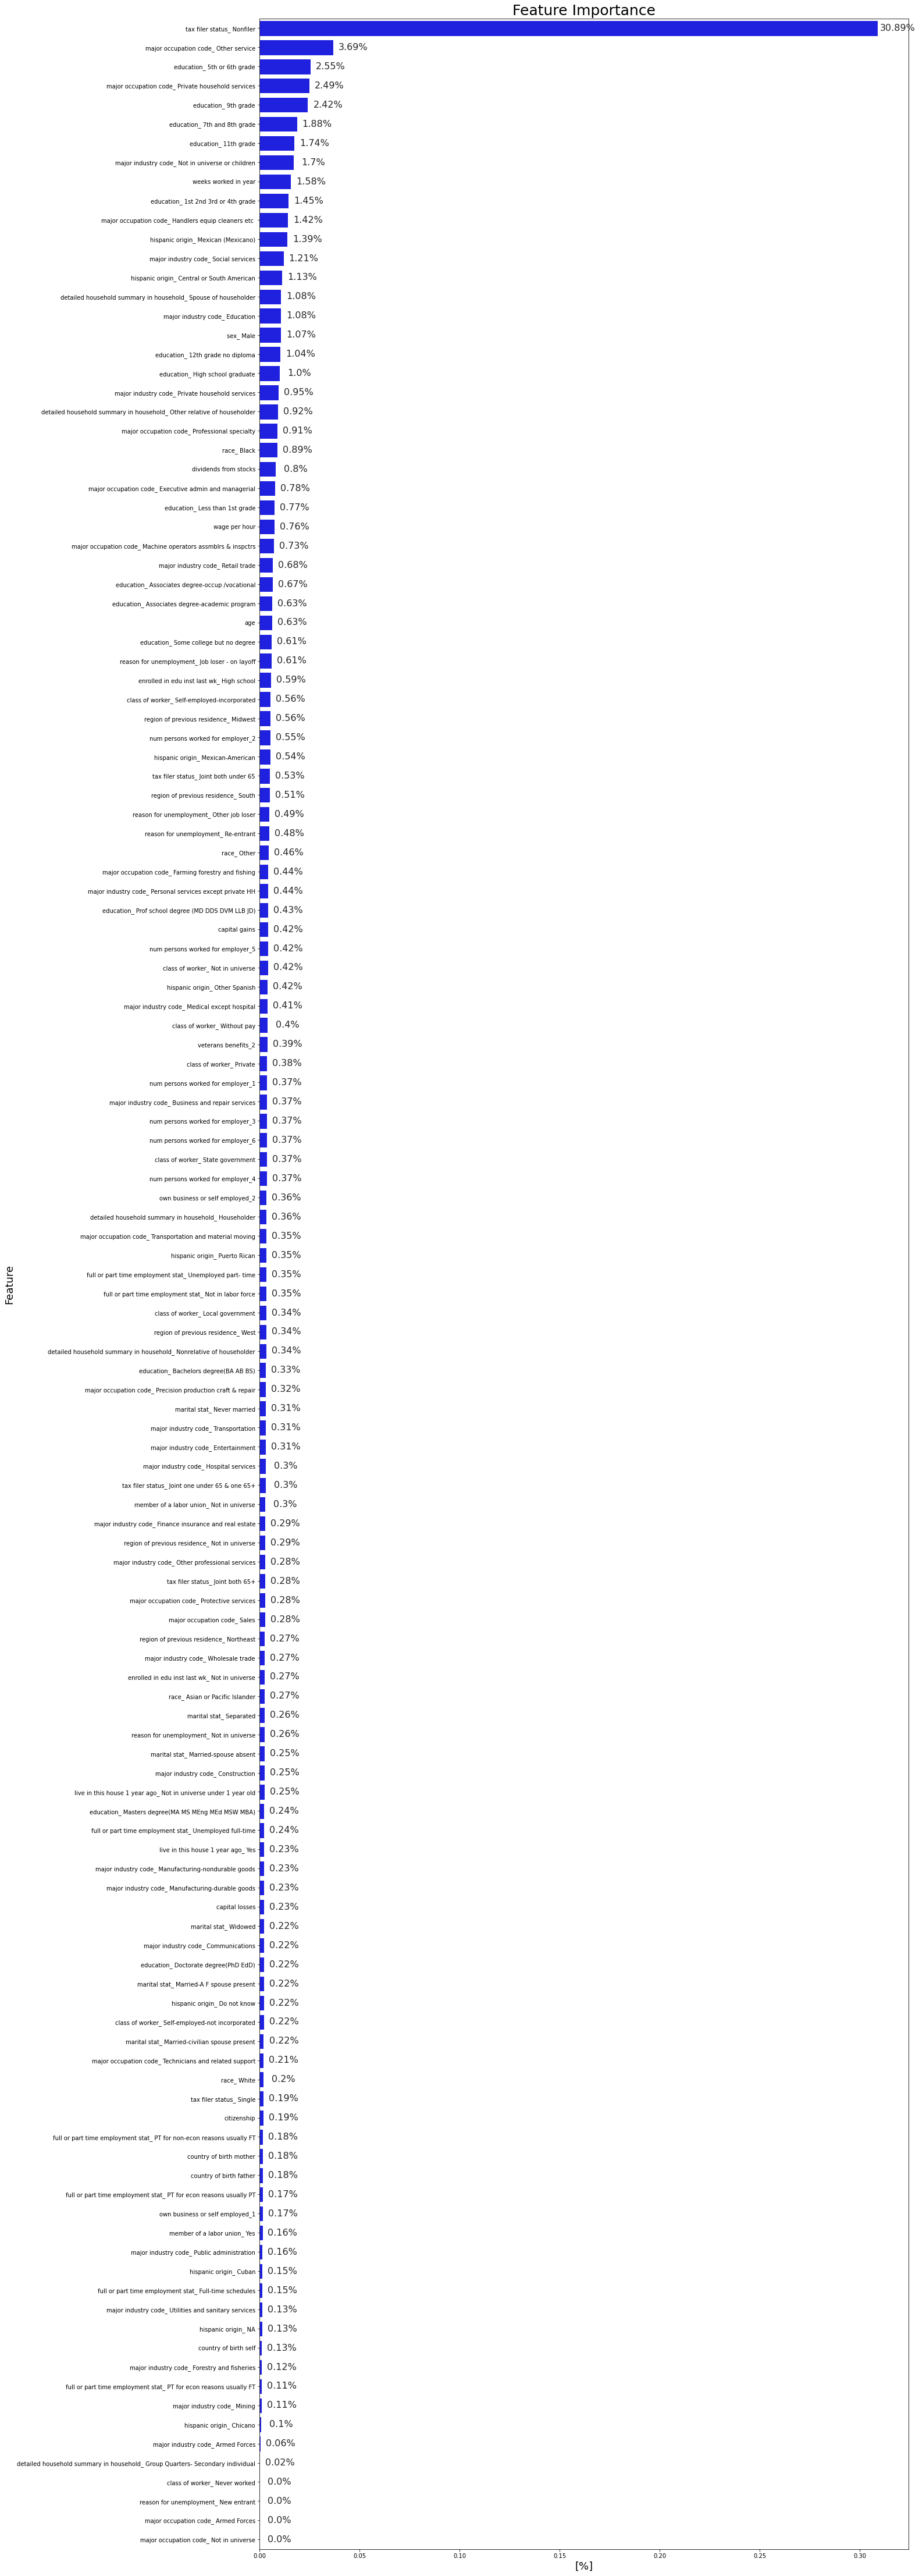

In [5]:
ordered_importances_porcentagem = [(round(element * 100,2))for element in ordered_importances]
f, ax = plt.subplots(figsize=(20, 80))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x=ordered_importances,y=features_names,
            label="Features", color="blue")
plt.title('Feature Importance',fontsize=25)
plt.xlabel('[%]',fontsize=18)
plt.ylabel('Feature',fontsize=18)

for i in range (0,len(ordered_importances)):
    
    plt.text(x=ordered_importances[i]+0.01, y=i , s=str(round(ordered_importances[i]*100,2))+'%'
             ,horizontalalignment='center',verticalalignment='center', fontsize=16)

plt.show()

Tax filer status as non filer comes as a surprise, however as stated [here](https://citizenpath.com/faq/not-required-file-federal-income-tax-return/):

"Not everyone is required to file a federal income tax return each year. Generally, if your total income for the year doesn’t exceed the standard deduction plus one exemption and you aren’t a dependent to another taxpayer, then you don’t need to file a federal tax return. The amount of income that you can earn before you are required to file a tax return also depends on the type of income, your age and your filing status."

So in theory if a person doesn't fill the tax income they are likely to earn less, or omitting information from the government.

In this scenario it makes sense that such a weight is observed, on a sidenote this will be investigated in the next notebook (Further Analysis and Final Remarks).

Following up the features that impact the income prediction are related to education and occupation, and we can identify real world observed relationships to those features.

At the top both being male and black also impact the income prediction, this could be a signal to investigate income biases.

### Recursive feature elimination

Following up we will perform a recursive feature elimination to both try to simplify our model and identify possible useful and/or useless features.

On a sidenote I am aware that the list of warnings below could be handled by reshaping the y_train data. However since time is a constriction and this step took hours to conclude, I chose to move on while keeping these warnings.

In [6]:
from sklearn.feature_selection import RFE 

clf= XGBC


rfe = RFE(clf, step = 1) 

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Num Features: 66
Selected Features: [ True  True  True False  True False False False False  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True False False  True False False False
 False False  True False False False  True False False  True False False
 False False False False  True False  True False  True  True False  True
  True  True False False False  True  True  True  True False  True  True
  True  True False False False  True False  True False False  True False
 False False  True  True False  True False  True False False False False
 False False  True False False False False False False False False  True
  True  True False  True False False  True False False  True  True  True
  True False False  True  True  True  True  True  True False  True  True]
Feature Ranking: [ 1  1  1 30  1 46 49 60 34  1  1 64  1  1  1 10  1  1  1  1  1  1  1  1
  1  1  1 23  1  1 25  9  1 39 36 41 51 14  1 42 47 62  1 44 33  1 15 

Half the features (66) were identified as essential to the model prediction. Let's take a closer look at which.

In [9]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_,
                                     'Support':rfe.support_})
pd.set_option("display.max_rows", len(selected_rfe_features))
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking,Support
0,age,1,True
79,race_ Black,1,True
77,major occupation code_ Transportation and mate...,1,True
73,major occupation code_ Professional specialty,1,True
72,major occupation code_ Private household services,1,True
71,major occupation code_ Precision production cr...,1,True
70,major occupation code_ Other service,1,True
68,major occupation code_ Machine operators assmb...,1,True
67,major occupation code_ Handlers equip cleaners...,1,True
66,major occupation code_ Farming forestry and fi...,1,True


In [13]:
selected_rfe_features.loc[selected_rfe_features.loc[:,'Support']==True].Feature.to_list()

['age',
 'wage per hour',
 'capital gains',
 'dividends from stocks',
 'weeks worked in year',
 'class of worker_ Local government',
 'class of worker_ Not in universe',
 'class of worker_ Private',
 'class of worker_ Self-employed-incorporated',
 'class of worker_ State government',
 'class of worker_ Without pay',
 'education_ 11th grade',
 'education_ 12th grade no diploma',
 'education_ 1st 2nd 3rd or 4th grade',
 'education_ 5th or 6th grade',
 'education_ 7th and 8th grade',
 'education_ 9th grade',
 'education_ Associates degree-academic program',
 'education_ Associates degree-occup /vocational',
 'education_ Bachelors degree(BA AB BS)',
 'education_ High school graduate',
 'education_ Less than 1st grade',
 'education_ Some college but no degree',
 'marital stat_ Never married',
 'major industry code_ Business and repair services',
 'major industry code_ Education',
 'major industry code_ Medical except hospital',
 'major industry code_ Not in universe or children',
 'major in

This is pretty much what was observed in the feature importance listing.

Age, occupation, education, origin, race, sex, and tax information seem to be key to predict someone's income.

However, when we look at the selected list we can see that many of the selected features are categories of a previously engineered feature, so removing them would need to be done with caution looking at each feature impact and division.

For curiosity purposes we will retrain the model with this selection of features to compare it against the model with all features in the following further analysis and final remarks notebook.